KNN Model = เพื่อนบ้านใกล้เคียง

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # ********
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix # รายงานผลการคลาดเคลื่อนของค่าพยากรณ์

import numpy as np # for create array 2D
import pandas as pd # read csv file
import matplotlib.pyplot as plt
# Machine Learning  แบบมีผู้สอน หรือก็คือมีเฉลย หรือเรียกว่า class

In [72]:
'''
x_train, x_test, y_train, y_test = train_test_split(dataset ที่จะให้แทนค่า x ,
                                                    dataset ที่จะให้แทนค่า y,                
                                                    test_size= ขนาดอัตราส่วนของข้อมูลกลุ่ม test ต่อข้อมูลกลุ่ม train มีค่่าอยู่ระหว่าง 0-1,
                                                    random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม
                                                    stratify คือ การกำหนดการกระจายของข้อมูลที่ split ให้มีการกระจายเหมือน original dataset
)
output ที่ได้มี 4 ตัว คือ data สำหรับ train และ test และ target สำหรับ train และ test ซึ่งจะเอาไปทำ classification ต่อไป
''' 
iris_dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"],test_size=0.4,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [73]:
# Model
knn = KNeighborsClassifier(n_neighbors=10)


In [74]:
# Training by uses an attribute fit -> model.fit(training x , training y)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [75]:
# Prediction by uses an attribute predict -> model(that was trained).predict(testing value which we need to predict)

pred = knn.predict([x_test[2]])

print(f"Predict Result: {pred}")
print(f"Predict Type: {iris_dataset["target_names"][pred]}")

Predict Result: [0]
Predict Type: ['setosa']


In [76]:
# Classification
y_pred = knn.predict(x_test)
# No Target names
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [77]:
# Have target names
# Easy to read!
print(classification_report(y_test, y_pred, target_names=iris_dataset["target_names"]))

# support = count(x_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.96      0.96      0.96        23
   virginica       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [78]:
# แสดงค่าความแม่นยำ เป็น Percentile
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}") 

Accuracy: 96.66666666666667


การพยากรณ์โรคเบาหวาน


In [110]:
diabetes_df = pd.read_csv("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset/diabetes.csv")
print(diabetes_df.head()) # output first 5 row
print(diabetes_df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [111]:
x = diabetes_df.drop('Outcome',axis=1).values   # delete column names Outcome refers to column 
                                                # attribute values means showing about values on the table
 
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [113]:
y = diabetes_df["Outcome"].values

print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


In [143]:
# find k to model
# การค่าที่ดีที่สุดของ n_neighbor or k ที่ทำให้แม่นยำมากที่สุด 

k_neighbors = np.arange(1,9)

train_score = np.empty(len(k_neighbors))  # store of values
test_score = np.empty(len(k_neighbors)) 

for i,k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # วัดประสิทธิภาพ model by score
    train_score[i] = knn.score(x_train,y_train)
    test_score[i] = knn.score(x_test, y_test)
    print(f"Test  Score  {i}: {test_score[i]*100}")
    print(f"Train Score  {i}: {train_score[i]*100}")


Test  Score  0: 69.48051948051948
Train Score  0: 100.0
Test  Score  1: 73.05194805194806
Train Score  1: 81.95652173913044
Test  Score  2: 75.0
Train Score  2: 81.52173913043478
Test  Score  3: 73.7012987012987
Train Score  3: 78.47826086956522
Test  Score  4: 74.02597402597402
Train Score  4: 79.56521739130434
Test  Score  5: 73.37662337662337
Train Score  5: 78.69565217391305
Test  Score  6: 75.0
Train Score  6: 76.95652173913044
Test  Score  7: 73.7012987012987
Train Score  7: 77.39130434782608


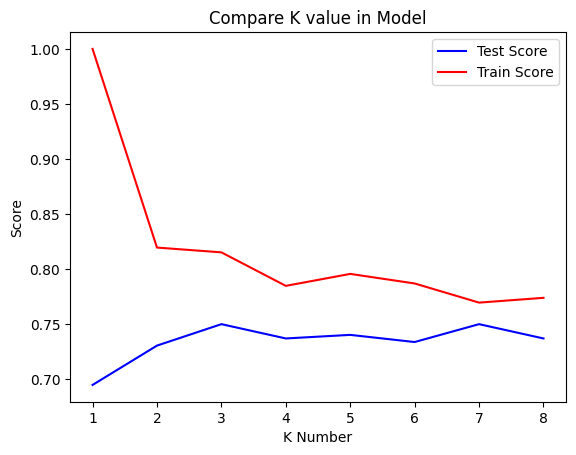

In [147]:
plt.title("Compare K value in Model")
plt.plot(k_neighbors,test_score,label="Test Score",color="b")
plt.plot(k_neighbors,train_score,label="Train Score",color="r")

plt.xlabel("K Number")
plt.ylabel("Score")
plt.legend()
plt.show()
# เลือกค่า k score ที่ได้ค่า ของ test score and train score ใกล้เคียงกันมากที่สุด

In [158]:
# จากการวัดประสิทธิภาพ จะได้ค่า k = 7 เพราะ มี score ใกล้เคียงกัน จึงเกิดความคลาดเคลื่อนน้อย
# Model
knn = KNeighborsClassifier(n_neighbors=7)

# Trian
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [162]:
# Prediction
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))
# 0 = ไม่เป็นเบาหวาน
# 1 = เป็นเบาหวาน

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       201
           1       0.69      0.50      0.58       107

    accuracy                           0.75       308
   macro avg       0.73      0.69      0.70       308
weighted avg       0.74      0.75      0.74       308



In [165]:
print(confusion_matrix(y_test, y_pred))

[[177  24]
 [ 53  54]]


In [169]:
# crosstab will show confusion matrix in simple read
pd.crosstab(y_test, y_pred, rownames=["Actually"],colnames=["Prediction"],margins=True)

Prediction,0,1,All
Actually,,,
0,177,24,201
1,53,54,107
All,230,78,308
